<a href="https://colab.research.google.com/github/EndangSupriyadi/Proyek_Kedua_Machine_Learning_Terapan/blob/main/Book_Recommendation_Machine_Learning_Terapan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing** **Libraries**

pada tahap ini kita mengimport library yang akan digunakan seperti kaggle, numpy dll

In [1]:
! pip install kaggle
import os
import numpy as np
import matplotlib.pyplot as plt



disini kita mengkoneksikan dengan gdrive yang kita miliki untuk menyimpan dataset

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

kita masuk ke path ini

In [4]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


lalu mendownload dataset

In [5]:
!kaggle datasets download -d arashnic/book-recommendation-dataset

Dataset URL: https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset
License(s): CC0-1.0
 41% 10.0M/24.3M [00:00<00:00, 104MB/s]
100% 24.3M/24.3M [00:00<00:00, 159MB/s]


menunzip dataset karena dataset yang didownload berbentuk zip

In [6]:
!unzip \*.zip && rm *.zip.

Archive:  book-recommendation-dataset.zip
  inflating: Books.csv               
replace DeepRec.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: DeepRec.png             
  inflating: Ratings.csv             
  inflating: Users.csv               
  inflating: classicRec.png          
  inflating: recsys_taxonomy2.png    
rm: cannot remove '*.zip.': No such file or directory


**Importing Dataset**

disini kita membaca dataset sesuai dengan path dari dataset

In [7]:
import pandas as pd

book_dataset = pd.read_csv('/content/gdrive/My Drive/Kaggle/Books.csv')
rating_dataset = pd.read_csv('/content/gdrive/My Drive/Kaggle/Ratings.csv')
users_dataset= pd.read_csv('/content/gdrive/My Drive/Kaggle/Users.csv')


/tmp/ipython-input-3432999720.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  book_dataset = pd.read_csv('/content/gdrive/My Drive/Kaggle/Books.csv')


menghitung jumlah baris dan kolom yang ada di dataset

In [8]:
book_dataset.shape


(271360, 8)

In [9]:
rating_dataset.shape


(1149780, 3)

In [10]:
users_dataset.shape

(278858, 3)

**Data** **Preprocessing**


menampilkan  5 rating tertinggi

In [11]:
rating_dataset.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


Cek Missing Value

In [12]:
book_dataset.isnull().sum()



,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,3


In [13]:
rating_dataset.isnull().sum()


,0
User-ID,0
ISBN,0
Book-Rating,0


In [14]:
book_dataset = book_dataset.dropna(axis=0)


In [15]:
book_dataset = book_dataset.dropna(axis=0)


In [16]:
book_dataset = book_dataset[book_dataset['Year-Of-Publication'] != 0]

mengganti nama Book-Rating dan User-ID dengan huruf kecil semua

In [17]:
rating_dataset = rating_dataset.rename(columns={'Book-Rating': 'rating','User-ID':'user_id'})

In [18]:
book_dataset = book_dataset[:10000]
rating_dataset=rating_dataset[:5000]

disini ada nilai 0 dimana 0 itu bukan nilai NaN jadi tidak membuat Nilai 0

In [19]:
#rating_dataset = rating_dataset.drop(rating_dataset[rating_dataset.rating == 0].index)

In [20]:
rating_dataset.head()

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


menampilkan 5 teratas data dalam dataset book_dataset

In [21]:
book_dataset.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


mengganti nama header

In [22]:
book_dataset = book_dataset.rename(columns={'Book-Title': 'book_title','Book-Author':'book_author','Year-Of-Publication':'year_of_publication','Image-URL-S':'Image_URL_S','Image-URL-M':'Image_URL_M','Image-URL-L':'Image_URL_L'})

In [23]:
rating_dataset.describe()


,user_id,rating
count,5000.000000,5000.00000
mean,277670.792000,2.89640
std,519.961823,3.83445
min,276725.000000,0.00000
25%,277203.000000,0.00000
50%,277639.000000,0.00000
75%,278144.000000,7.00000
max,278418.000000,10.00000


meneliti Id buku apa saja yang ada di rate 10 oleh pengguna



In [24]:
rating_dataset[rating_dataset.rating == max(rating_dataset.rating)]
best_booksId = rating_dataset.ISBN[rating_dataset.rating == max(rating_dataset.rating)]
best_booksId = list(dict.fromkeys(best_booksId))

meneliti buku apa saja yang ada di rate 10 oleh pengguna

In [25]:
best_books = []
for i in best_booksId:
    books_name = book_dataset.book_title[book_dataset.ISBN == i]
    best_books.append(books_name)

In [26]:
best_books

[Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 5731    The Watsons Go to Birmingham - 1963 (Yearling ...
 Name: book_title, dtype: object,
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 8271    Auf Ehre und Gewissen. Roman.
 Name: book_title, dtype: object,
 5732    Im Angesicht des Feindes.
 Name: book_title, dtype: object,
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title,

Meneliti jumlah buku - buku bagus

In [27]:
len(best_books)


300

Univariate Data Analysis <br>
Meneliti distribusi rating dari rating dataframe dengan Barplot

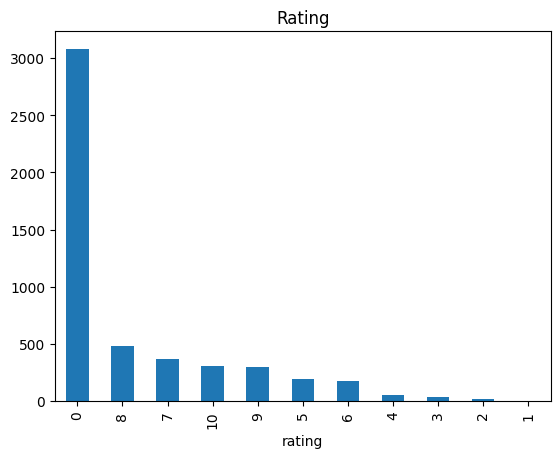

In [28]:
count = rating_dataset["rating"].value_counts()
count.plot(kind='bar', title="Rating");

plt.show()

Meneliti distribusi tahun terbitnya buku dari book dataframe dengan Barplot



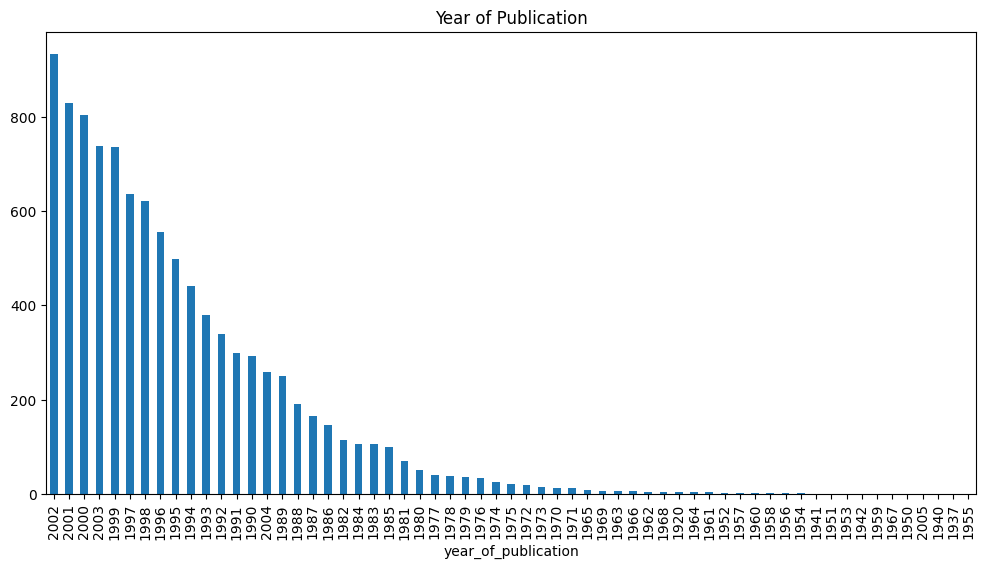

In [29]:
count = book_dataset["year_of_publication"].value_counts()
count.plot(kind='bar', title="Year of Publication", figsize=(12, 6));

plt.show()

Multivariate Analysis

Melihat pairplot yang ada pada rating dataset



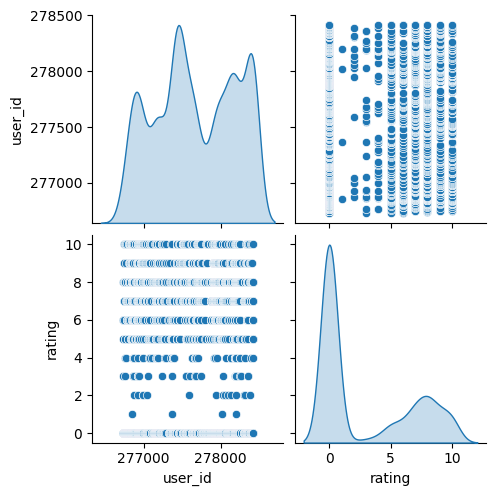

In [30]:
import seaborn as sns
sns.pairplot(rating_dataset, diag_kind = 'kde')

**Content Filtered Recommendation System**

Data Preparation

Di code bawah ini saya men-drop seluruh row yang memiliki nilai NaN



In [31]:
book_dataset = book_dataset.dropna()
rating_dataset = rating_dataset.dropna()

membuang row yang duplikasi

In [32]:
rating_dataset = rating_dataset.drop_duplicates()
book_dataset = book_dataset.drop_duplicates()

In [33]:
book_dataset.shape

(10000, 8)

In [34]:
rating_dataset.shape

(5000, 3)

melihat row 5 teratas

In [35]:
book_dataset.head()

,ISBN,book_title,book_author,year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


mengubah dataframe dari buku menjadi list

In [36]:
book_ISBN = book_dataset['ISBN'].tolist()

book_title = book_dataset['book_title'].tolist()

book_author = book_dataset['book_author'].tolist()

book_year_of_publication = book_dataset['year_of_publication'].tolist()

Setelah kita membuat list, kita perlu membuat dictionary yang digunakan untuk menentukan pasangan key-value pada book_ISBN, book_title, book_author, dan book_year_of_publication.

In [37]:
book = pd.DataFrame({
    'book_ISBN': book_ISBN,
    'book_title': book_title,
    'book_author': book_author,
    'book_year_of_publication': book_year_of_publication
})
book

,book_ISBN,book_title,book_author,book_year_of_publication
0,0195153448,Classical Mythology,Mark P. O. Morford,2002
1,0002005018,Clara Callan,Richard Bruce Wright,2001
2,0060973129,Decision in Normandy,Carlo D'Este,1991
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999
...,...,...,...,...
9995,0515101230,The Cat Who Went Underground,Lilian Jackson Braun,1991
9996,0515129941,The Cat Who Robbed a Bank (Cat Who... (Paperba...,Lilian Jackson Braun,2001
9997,0590421174,How Spider Saved Halloween,Robert Kraus,1988
9998,089919463X,The Teeny-Tiny Woman,Paul Galdone,1986


Modeling

TF-IDF yang merupakan kepanjangan dari Term Frequency-Inverse Document Frequency memiliki fungsi untuk mengukur seberapa pentingnya suatu kata terhadap kata - kata lain dalam dokumen. Kita umumnya menghitung skor untuk setiap kata untuk menandakan pentingnya dalam dokumen dan corpus. Metode sering digunakan dalam Information Retrieval dan Text Mining.

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()

tf.fit(book['book_author'])

feature_names = tf.get_feature_names_out()
print(feature_names)


['aaron' 'aarsen' 'abbey' ... 'âºlveda' 'â¼ltner' 'â¼skind']


Kemudian kita akan lakukan fit dan transformasi ke dalam matriks, pada code di bawah ini, matriks tersebut adalah tfidf_matrix

In [39]:
tfidf_matrix = tf.fit_transform(book['book_author'])

tfidf_matrix.shape

(10000, 5586)

Pada tfidf_matrix terdapat 10000 ukuran data dan 5575 nama penulis buku



.todense(), atribut ini dipakai untuk mengubah tfidf_matrix yang awalnya vektor menjadi matriks

In [40]:
tfidf_matrix.todense()


matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Dataframe di bawah ini digunakan untuk melihat matriks dari judul buku dengan penulis - penulis buku

In [41]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=book.book_title
).sample(17, axis=1,replace=True).sample(10, axis=0)

,derbyshire,kearney,west,kitty,kluger,westall,gore,la,rachelle,lange,ferris,dobbs,janette,micah,la,sherman,rollin
book_title,,,,,,,,,,,,,,,,,
The Jester,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Une Breve Histoire Du Temps,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Devil Wears Prada : A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Nazi Officer's Wife : How One Jewish Woman Survived the Holocaust,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Skin And Bones,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
John Saul: Three Terrifying Bestselling Novels,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
With Song,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Full House (Janet Evanovich's Full Series),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Kitchen Boy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Dalam sistem rekomendasi, kita perlu mencari cara supaya item yang kita rekomendasikan tidak terlalu jauh dari data pusat, oleh karena itu kita butuh derajat kesamaan pada item, dalam proyek ini, buku dengan derajat kesamaan antar buku dengan cosine similarity

In [42]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Pada code di bawah ini kita akan membuat dataframe cosine_sim_df dengan baris dan kolomnya adalah judul dari buku

In [43]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=book['book_title'], columns=book['book_title'])

Di bawah ini adalah fungsi untuk mendapatkan rekomendasi berbasis penulis buku dengan k sebagai jumlah rekomendasi yang diinginkan, dalam fungsi ini, kita akan mendapatkan 5 rekomendasi

Atribut argpartition berguna untuk mengambil sejumlah nilai k, dalam fungsi ini 5 tertinggi dari tingkat kesamaan yang berasal dari dataframe cosine_sim_df.

In [44]:
def author_recommendations(i, M, items, k=5):
    ix = M.loc[:,i].to_numpy().argpartition(range(-1,-k,-1))
    closest = M.columns[ix[-1:-(k+2):-1]]
    closest = closest.drop(i, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

Pada code cell di bawah ini, kita akan mencari rekomendasi dari buku yang sudah dibaca, dalam kasus ini, buku yang sudah dibaca adalah "The Diaries of Adam and Eve" yang ditulis oleh Mark Twain dan terbit pada tahun 1998

In [45]:
books_that_have_been_read = "The Diaries of Adam and Eve"
book[book.book_title.eq(books_that_have_been_read)]

,book_ISBN,book_title,book_author,book_year_of_publication
4623,0965881199,The Diaries of Adam and Eve,Mark Twain,1998


Pada cell code di bawah ini, kita akan mendapatkan 5 rekomendasi dari buku "The Diaries of Adam and Eve"

In [46]:
recommendations = author_recommendations(books_that_have_been_read, cosine_sim_df, book[['book_title', 'book_author']])

Pada beberapa kasus, rekomendasi akan memberikan rekomendasi yang terduplikat, sehingga perlu dibuang rekomendasi yang terduplikat

In [47]:
recommendations = recommendations.drop_duplicates()

Berikut adalah 5 buku rekomendasi yang ditulis oleh Mark Twain



In [48]:
recommendations

,book_title,book_author
0,Adventures of Huckleberry Finn (Signet Classic...,Mark Twain
1,The Adventures of Tom Sawyer,Mark Twain
3,Adventures of Tom Sawyer,Mark Twain
4,Adventures of Huckleberry Finn (Dover Thrift E...,Mark Twain


In [49]:
recommended_books = recommendations['book_title'].tolist()


In [50]:
recommended_books

['Adventures of Huckleberry Finn (Signet Classics (Paperback))',
 'The Adventures of Tom Sawyer',
 'Adventures of Tom Sawyer',
 'Adventures of Huckleberry Finn (Dover Thrift Editions)']

Evaluation

Kita akan memakai metrik evaluasi akurasi di mana akurasi adalah:

Jumlah buku yang direkomendasikan sesuai penulis / Jumlah buku yang ditulis oleh penulis yang sama

Variabel books_that_have_been_read_row di bawah ini akan mengambil satu row dari buku yang pernah dibaca sebelumnya, dan variabel books_that_have_been_read_author adalah penulis buku dari buku yang pernah dibaca sebelumnya

In [51]:
books_that_have_been_read_row = book_dataset[book_dataset.book_title == books_that_have_been_read]
books_that_have_been_read_author = books_that_have_been_read_row.iloc[0]["book_author"]

Variabel books_with_the_same_author menunjukkan jumlah buku yang sudah ditulis oleh penulis buku yang berasal dari buku yang pernah dibaca sebelumnya

In [52]:
books_with_the_same_author = book_dataset[book_dataset.book_author == books_that_have_been_read_author].shape[0]
print(books_with_the_same_author)

16


Ternyata buku yang telah ditulis oleh Mark Twain berjumlah 16 buku


Dalam evaluasi yang digunakan adalah precision yaitu salah satu metrik yang digunakan untuk mengukur seberapa akurat sistem rekomendasi dalam memberikan rekomendasi yang relevan kepada pengguna. membandingkan tingkat kesamaannya metrik evaluasi precision: Jumlah buku yang memiliki kemiripan dalam buku yang direkomendasikan/ Jumlah buku yang direkomendasikan penulis buku yang sudah di baca Mark Twain seperti tabel 5, dan jumlah buku yang direkomendasikan tabel 6 jadi precision : 5/5 = 100% sama

**Collaborative Based Filtering**

Collaborative Based Filtering adalah sistem rekomendasi berdasarkan pendapat suatu komunitas.

Kelebihan pada Collaborative Based Filtering bila dibandingkan dengan Content Based Filtering adalah pengguna dapat mengeksplorasi item atau konten di luar preferensi pengguna. Pengguna pun juga dapat mendapat rekomendasi sesuai dengan kecenderungan publik yang dianalisa lewat penilaian pengguna - pengguna lainnya.

Kekurangan pada Collaborative Based Filtering adalah pengguna kurang mendapatkan rekomendasi sesuai preferensi pribadi. Konten - konten yang diberikan oleh sistem rekomendasi lebih banyak berasal dari preferensi publik dan bukan preferensi pribadi.

Pada Collaborative Based Filtering, saya menggunakan penilaian dari pengguna - pengguna untuk mendapatkan rekomendasi buku - buku.

Data Preparation

Pada cell code di bawah ini, saya akan meyandikan user_id menjadi integer



In [53]:
user_ids = rating_dataset['user_id'].unique().tolist()

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

Pada cell code di bawah ini, saya akan meyandikan book_id menjadi integer



In [54]:
book_ids = rating_dataset['ISBN'].unique().tolist()
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}

rating_dataset['user'] = rating_dataset['user_id'].map(user_to_user_encoded)
rating_dataset['book'] = rating_dataset['ISBN'].map(book_to_book_encoded)

Terakhir, kita akan cek jumlah pengguna dan jumlah buku, serta mengubah tipe data rating menjadi float



In [55]:
num_users = len(user_encoded_to_user)
print(num_users)
num_book = len(book_encoded_to_book)
print(num_book)
rating_dataset['rating'] = rating_dataset['rating'].values.astype(np.float32)

min_rating = min(rating_dataset['rating'])
max_rating = max(rating_dataset['rating'])

print('Number of User: {}, Number of Book: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))

679
4688
Number of User: 679, Number of Book: 4688, Min Rating: 0.0, Max Rating: 10.0


Membagi Dataset

Sebelum kita membagi dataset menjadi data latih dan data validasi, kita terlebih dahulu harus mengacak dataset



In [56]:
rating_dataset = rating_dataset.sample(frac=1, random_state=42)
rating_dataset

,user_id,ISBN,rating,user,book
1501,277427,0201000822,10.0,255,1470
2586,277639,0453008739,0.0,335,2487
2653,277639,0671509144,0.0,335,2550
1055,277187,0553281089,0.0,170,1041
705,276964,0886774829,8.0,96,696
...,...,...,...,...,...
4426,278418,0061091464,0.0,678,4127
466,276925,3775713328,0.0,80,461
3092,277928,0937247065,7.0,476,2935
3772,278159,0385318073,5.0,574,3549


Pada cell code di bawah ini, saya membagi dataset yang ada menjadi 80% untuk latihan dan 20% untuk validasi



In [57]:
x = rating_dataset[['user', 'book']].values

y = rating_dataset['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.80 * rating_dataset.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 255 1470]
 [ 335 2487]
 [ 335 2550]
 ...
 [ 476 2935]
 [ 574 3549]
 [ 139  850]] [1.  0.  0.  ... 0.7 0.5 0.5]


Model Development

In [58]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

In [59]:
class RecommenderNet(tf.keras.Model):

  def __init__(self, num_users, num_rating, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_rating = num_rating
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.resto_embedding = layers.Embedding(
        num_rating,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.resto_bias = layers.Embedding(num_rating, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    rating_vector = self.resto_embedding(inputs[:, 1])
    rating_bias = self.resto_bias(inputs[:, 1])

    dot_user_rating = tf.tensordot(user_vector, rating_vector, 2)

    x = dot_user_rating + user_bias + rating_bias

    return tf.nn.sigmoid(x)

Selanjutnya kita melakukan proses compile pada model dengan binary crossentropy sebagai loss function, adam sebagai optimizer, dan RMSE sebagai metrik dari model



In [60]:
model = RecommenderNet(num_users, num_book, 50)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [61]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 5,
    epochs = 30,
    validation_data = (x_val, y_val)
)

Epoch 1/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.6790 - root_mean_squared_error: 0.4294 - val_loss: 0.6362 - val_root_mean_squared_error: 0.4039
Epoch 2/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.5804 - root_mean_squared_error: 0.3714 - val_loss: 0.6049 - val_root_mean_squared_error: 0.3855
Epoch 3/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.5250 - root_mean_squared_error: 0.3410 - val_loss: 0.5888 - val_root_mean_squared_error: 0.3767
Epoch 4/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.5086 - root_mean_squared_error: 0.3279 - val_loss: 0.5741 - val_root_mean_squared_error: 0.3689
Epoch 5/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.4738 - root_mean_squared_error: 0.3088 - val_loss: 0.5635 - val_root_mean_squared_error: 0.3637
Epoch 6/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.4533 - root_mean_squared_error: 0.3012 - val_loss: 0.5554 - val_root_mean_squared_error: 0.3599
Epoch 7/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step 

Visualisasi Metrik


Berikut adalah hasil latihan dari data yang ada, evaluasi metrik yang digunakan adalah RMSE



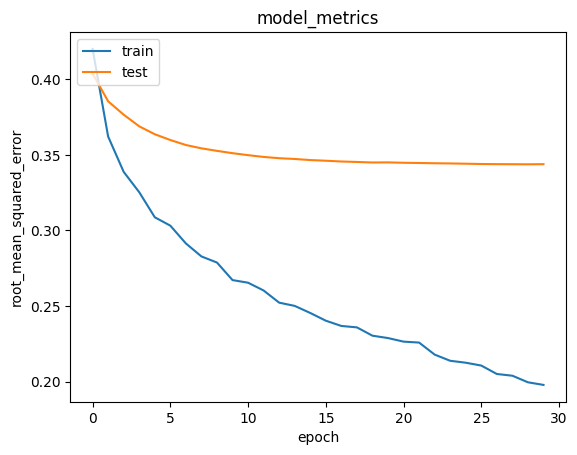

In [62]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Mendapatkan Rekomendasi

Sebelumnya, kita perlu mendefinisikan ulang book_datase dan rating_dataset



In [63]:
book_dataset =  book_dataset
rating_dataset = rating_dataset

Pada cell code di bawah ini, kita akan mengambil user_id secara acak dari rating_dataset. Dari user_id ini kita perlu mengetahui buku - buku apa saja yang pernah dibaca dan yang belum pernah dibaca, sehingga kita hanya dapat merekomendasikan buku - buku yang belum dibaca.

In [64]:
user_id = rating_dataset.user_id.sample(1).iloc[0]
books_have_been_read_by_user = rating_dataset[rating_dataset.user_id == user_id]

books_have_not_been_read_by_user = book_dataset[book_dataset['ISBN'].isin(books_have_been_read_by_user.ISBN.values)]['ISBN']
books_have_not_been_read_by_user = list(
    set(books_have_not_been_read_by_user)
    .intersection(set(book_to_book_encoded.keys()))
)

books_have_not_been_read_by_user = [[book_to_book_encoded.get(x)] for x in books_have_not_been_read_by_user]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(books_have_not_been_read_by_user), books_have_not_been_read_by_user)
)

Pada code cell terakhir di bawah ini, kita akan merekomendasikan 10 buku dari user



In [65]:
ratings = model.predict(user_book_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_ids = [
    book_encoded_to_book.get(books_have_not_been_read_by_user[x][0]) for x in top_ratings_indices
]

top_books_recommended = (
    books_have_been_read_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)

books_row = book_dataset[book_dataset['ISBN'].isin(top_books_recommended)]
for row in books_row.itertuples():
    print(row.book_title, ':', row.book_author)

print('----' * 8)
print('Top 10 Book Recommendation for user: {}'.format(user_id))
print('----' * 8)

recommended_books = book_dataset[book_dataset['ISBN'].isin(recommended_book_ids)]
for row in recommended_books.itertuples():
    print(row.book_title, ':', row.book_author)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Life of Pi : Yann Martel
--------------------------------
Top 10 Book Recommendation for user: 277959
--------------------------------
Life of Pi : Yann Martel
A Kiss Remembered: A Classic Love Story : Sandra Brown
Catch Me If You Can: The True Story of a Real Fake : Stan Redding
